In [0]:
%tensorflow_version 2.x

In [95]:
#Librerías
import os
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

tf.__version__


'2.2.0'

In [0]:
#Importa data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
X_cv, X_test = X_test[7000:], X_test[:7000]
y_cv, y_test = y_test[7000:], y_test[:7000]

In [98]:
print(X_cv.shape, X_test.shape)

(3000, 28, 28) (7000, 28, 28)


In [0]:
Xin = Input(shape=(28, 28))
X = Flatten()(Xin)
X = Dense(300, activation="relu")(X)
X = Dense(200, activation="relu")(X)
X = Dense(100, activation="relu")(X)
X = Dense(50, activation="relu")(X)
X = Dense(10, activation="softmax")(X)

model = Model(inputs=Xin, outputs=X)

In [0]:
model.compile(optimizer="sgd", # equiv "sgd"
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [101]:
model.fit(x=X_train / 255.0, y=y_train, epochs=30, validation_data=(X_test / 255.0, y_test))

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7094 - accuracy: 0.7632 - val_loss: 0.5247 - val_accuracy: 0.8184
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4625 - accuracy: 0.8375 - val_loss: 0.4551 - val_accuracy: 0.8421
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4120 - accuracy: 0.8533 - val_loss: 0.4327 - val_accuracy: 0.8460
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3819 - accuracy: 0.8629 - val_loss: 0.4426 - val_accuracy: 0.8457
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3595 - accuracy: 0.8695 - val_loss: 0.3923 - val_accuracy: 0.8601
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3431 - accuracy: 0.8752 - val_loss: 0.3866 - val_accuracy: 0.8620
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3271 - accuracy: 0.8807 - val_loss: 0.3890 - val_accuracy:

In [102]:
hist = model.history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

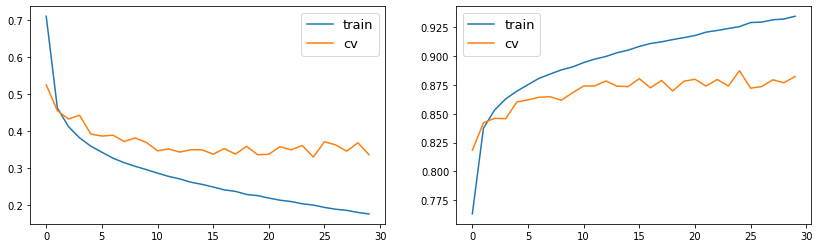

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(hist["loss"], label="train")
ax[0].plot(hist["val_loss"], label="cv")
ax[0].legend(fontsize=13)

ax[1].plot(hist["accuracy"], label="train")
ax[1].plot(hist["val_accuracy"], label="cv")
ax[1].legend(fontsize=13)

In [0]:
preds = model.predict(X_cv)

In [105]:
pred_list = []
for i in preds:
    pred_list.append(np.argmax(i))

print('{}%'.format(accuracy_score(y_pred=pred_list,y_true=y_cv) * 100))

85.43333333333332%


In [106]:
confusion_matrix(y_true=y_cv, y_pred=pred_list)

array([[242,  11,  15,   8,   2,   0,  29,   0,   5,   0],
       [  0, 315,   0,   0,   4,   0,   0,   0,   0,   0],
       [  3,   2, 178,   2,  73,   0,  10,   0,   5,   0],
       [  2,   7,   8, 254,  15,   0,   2,   0,   3,   0],
       [  0,   1,   6,   2, 276,   0,   2,   0,   1,   0],
       [  0,   0,   0,   0,   0, 281,   0,   1,   2,  12],
       [ 38,   3,  28,   8,  57,   0, 168,   0,   6,   0],
       [  0,   0,   0,   0,   0,   6,   0, 250,   4,  47],
       [  0,   0,   1,   0,   1,   0,   0,   0, 289,   0],
       [  0,   0,   0,   0,   0,   4,   0,   1,   0, 310]])